# Classificação de qualidade do Vinho

In [75]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd
import pylab 
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from graphviz import Source
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Explicação do significado de cada variável
Variáveis
-  'fixed acidity': 'Quantidade de acidez fixa no vinho.',
- 'volatile acidity': 'Quantidade de acidez volátil no vinho.',
- 'citric acid': 'Quantidade de ácido cítrico no vinho.',
- 'residual sugar': 'Açúcar residual, refere-se ao açúcar restante após a fermentação.',
- 'chlorides': 'Quantidade de cloretos no vinho.',
- 'free sulfur dioxide': 'Dióxido de enxofre livre no vinho.',
- 'total sulfur dioxide': 'Dióxido de enxofre total no vinho.',
- 'density': 'Densidade do vinho.',
-  'pH': 'pH do vinho.',
- 'sulphates': 'Sulfatos presentes no vinho.',
-  'alcohol': 'Teor alcoólico do vinho.',
- 'quality': 'Classificação de qualidade do vinho.'

In [63]:
df_white = pd.read_csv("C:\\Users\\rodri\\Projetos\\datascience\\input\\wine+quality\\winequality-white.csv", sep= ";")
df_red = pd.read_csv("C:\\Users\\rodri\\Projetos\\datascience\\input\\wine+quality\\winequality-red.csv", sep= ";")
# Adicionar uma nova coluna para identificar o tipo de vinho
df_white['wine_type'] = 'white'
df_red['wine_type'] = 'red'

# Combinar os dois datasets
wines = pd.concat([df_white, df_red], ignore_index=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [64]:
wines['quality_label'] = wines.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')
#wines.quality_label = pd.Categorical(wines.quality_label, categories=['low', 'medium', 'high'], ordered=True)

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=101).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.3,0.28,0.42,14.4,0.040,49.0,173.0,0.99940,3.28,0.82,9.0,7,white,medium
1,6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4,red,low
2,9.5,0.46,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0,6,red,medium
3,8.2,0.31,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7,red,medium
4,7.9,0.28,0.41,4.9,0.058,31.0,153.0,0.99660,3.27,0.51,9.7,6,white,medium


In [65]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [66]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
quality_label            object
dtype: object

In [67]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [68]:
num_variables = wines.shape[1]
num_variables

14

In [69]:
wines.dropna().quality_label.value_counts()

quality_label
medium    3915
low       2384
high       198
Name: count, dtype: int64

# Pré-Processamento

In [71]:
# Codificação das variáveis categóricas
label_encoder = LabelEncoder()
wines['wine_type'] = label_encoder.fit_transform(wines['wine_type'])
wines['quality_label'] = label_encoder.fit_transform(wines['quality_label'])

# Separando as features e o target
X = wines.drop(['quality', 'quality_label'], axis=1)  # Features
y = wines['quality_label']  # Target

# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o modelo de Machine Learning

In [72]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Inicializando os modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Avaliando os modelos usando validação cruzada
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    
    results[model_name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

# Exibindo os resultados
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  F1-Score   ROC AUC
Logistic Regression     0.710769  0.693197  0.781941
K-Nearest Neighbors     0.698462  0.692196  0.742441
Random Forest           0.789744  0.784975  0.882108
Support Vector Machine  0.741538  0.726282  0.824794


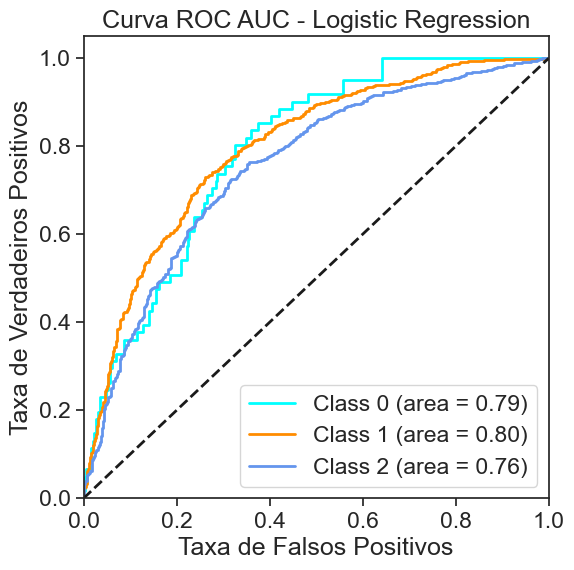

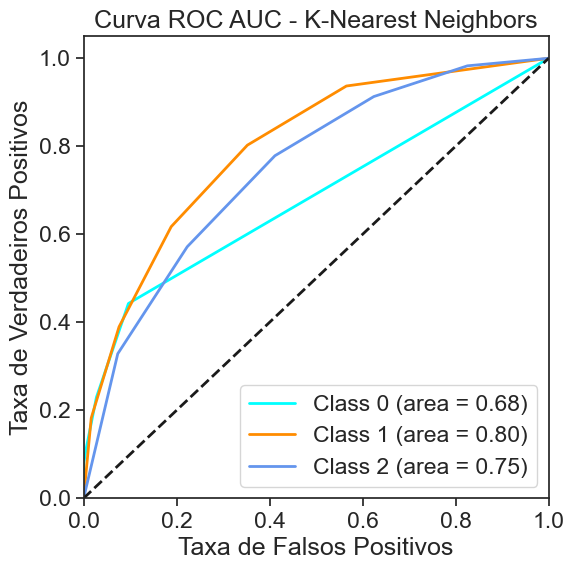

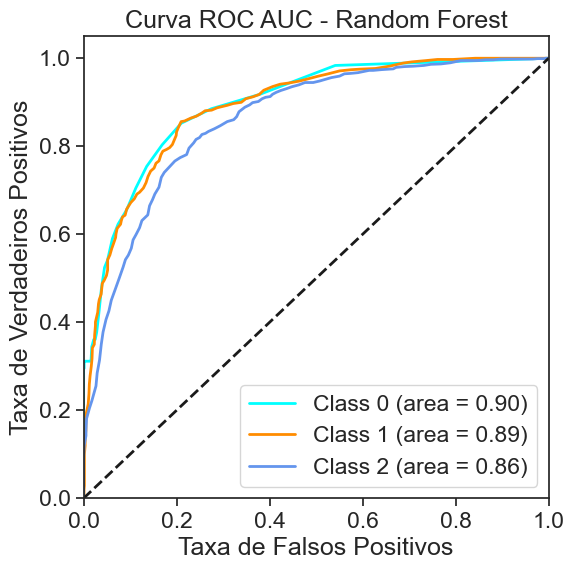

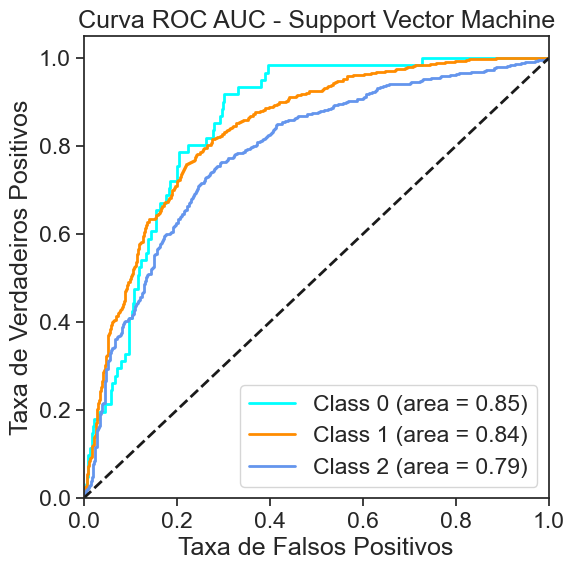

In [78]:
# Binarizar os rótulos
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Função para plotar a curva ROC de um modelo
def plot_roc_curves_for_model(model, model_name):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    # Plotar a curva ROC para cada classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    plt.figure(figsize=(6, 6))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (area = {roc_auc[i]:0.2f})')

    # Linha diagonal
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC AUC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plotando os gráficos separadamente para cada modelo
for model_name, model in models.items():
    plot_roc_curves_for_model(model, model_name)